In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/MyDrive/datasets/new_data.csv'
new_data = pd.read_csv(data_path)

In [4]:
new_data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,9,09:40,$65.50,Swipe Transaction,-3345936507911876459,La Verne,CA,91750.0,7538,Technical Glitch,No
1,0,0,2002,9,12,06:21,$122.10,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,Insufficient Balance,No
2,0,0,2002,9,17,06:09,$120.19,Swipe Transaction,-34551508091458520,La Verne,CA,91750.0,5912,Insufficient Balance,No
3,0,0,2002,9,20,06:01,$104.77,Swipe Transaction,-245178307025547046,La Verne,CA,91750.0,5311,Insufficient Balance,No
4,0,0,2002,9,29,06:06,$119.61,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,Insufficient Balance,No


In [5]:
new_data.shape

(324844, 15)

In [6]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324844 entries, 0 to 324843
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User            324844 non-null  int64  
 1   Card            324844 non-null  int64  
 2   Year            324844 non-null  int64  
 3   Month           324844 non-null  int64  
 4   Day             324844 non-null  int64  
 5   Time            324844 non-null  object 
 6   Amount          324844 non-null  object 
 7   Use Chip        324844 non-null  object 
 8   Merchant Name   324844 non-null  int64  
 9   Merchant City   324844 non-null  object 
 10  Merchant State  324844 non-null  object 
 11  Zip             324844 non-null  float64
 12  MCC             324844 non-null  int64  
 13  Errors?         324844 non-null  object 
 14  Is Fraud?       324844 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 37.2+ MB


In [7]:
new_data.describe()

,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,324844.000000,324844.000000,324844.000000,324844.000000,324844.000000,3.248440e+05,324844.000000,324844.000000
mean,1002.853416,1.349017,2011.764555,6.528521,15.694210,-5.837851e+17,51123.542836,5575.035214
std,570.366151,1.398308,5.185535,3.470648,8.787876,4.564798e+18,29065.689711,835.915843
min,0.000000,0.000000,1991.000000,1.000000,1.000000,-9.220641e+18,1001.000000,1711.000000
25%,509.000000,0.000000,2008.000000,3.000000,8.000000,-4.282467e+18,28792.000000,5300.000000
50%,1006.000000,1.000000,2012.000000,7.000000,16.000000,-7.948098e+17,46742.000000,5499.000000
75%,1482.000000,2.000000,2016.000000,10.000000,23.000000,2.027554e+18,77338.000000,5812.000000
max,1999.000000,8.000000,2020.000000,12.000000,31.000000,9.222877e+18,99829.000000,9402.000000


In [8]:
new_data.duplicated().sum()

0

In [9]:
new_data.isnull().sum()

,0
User,0
Card,0
Year,0
Month,0
Day,0
Time,0
Amount,0
Use Chip,0
Merchant Name,0
Merchant City,0


In [10]:
new_data['Is Fraud?'].value_counts()

,count
Is Fraud?,
No,324625
Yes,219


In [11]:
for col in new_data.columns:
    print('{}: {}'.format(col, new_data[col].nunique()))

User: 1881
Card: 9
Year: 30
Month: 12
Day: 31
Time: 1440
Amount: 22302
Use Chip: 2
Merchant Name: 19144
Merchant City: 6887
Merchant State: 51
Zip: 13590
MCC: 103
Errors?: 13
Is Fraud?: 2


In [12]:
print(new_data['Card'].unique())
print(new_data['Merchant State'].unique())
print(new_data['Merchant City'].unique())
print(new_data['Year'].unique())
print(new_data['Month'].unique())
print(new_data['Day'].unique())
print(new_data['Errors?'].unique())
print(new_data['MCC'].unique())

[0 1 2 3 4 5 6 7 8]
['CA' 'TX' 'NJ' 'UT' 'FL' 'NV' 'HI' 'NY' 'MA' 'MI' 'MN' 'IA' 'IL' 'WA'
 'SC' 'AK' 'CO' 'NC' 'OH' 'ME' 'MO' 'PA' 'AR' 'GA' 'CT' 'AZ' 'DC' 'KY'
 'AL' 'OR' 'WI' 'IN' 'MD' 'VA' 'TN' 'LA' 'RI' 'OK' 'KS' 'ND' 'NM' 'MS'
 'NH' 'NE' 'WV' 'ID' 'DE' 'WY' 'SD' 'MT' 'VT']
['La Verne' 'Mira Loma' 'Carrizo Springs' ... 'Jenkintown'
 'King Of Prussia' 'Star City']
[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 1999 2000 2001 1998 1996 1997 1994 1995 1991
 1992 1993]
[ 9  1  3  4  5  6  7 10 11 12  8  2]
[ 9 12 17 20 29 30  2 31 10 15  1 21 25 28  7  3 23 13 18 27  6  8 14 22
 24  5 16  4 11 19 26]
['Technical Glitch' 'Insufficient Balance' 'Bad PIN'
 'Bad PIN,Insufficient Balance' 'Bad PIN,Technical Glitch' 'Bad Zipcode'
 'Insufficient Balance,Technical Glitch'
 'Bad Zipcode,Insufficient Balance' 'Bad Zipcode,Technical Glitch'
 'Bad CVV' 'Bad Expiration' 'Bad Card Number'
 'Bad Card Number,Insufficient Balance']
[7538 5411 5912 5311

In [13]:
# replace $ in Amount column with space (extract only numbers)
new_data['Amount'] = new_data['Amount'].str.replace('$', '').astype('float')

In [14]:
new_data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,9,09:40,65.50,Swipe Transaction,-3345936507911876459,La Verne,CA,91750.0,7538,Technical Glitch,No
1,0,0,2002,9,12,06:21,122.10,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,Insufficient Balance,No
2,0,0,2002,9,17,06:09,120.19,Swipe Transaction,-34551508091458520,La Verne,CA,91750.0,5912,Insufficient Balance,No
3,0,0,2002,9,20,06:01,104.77,Swipe Transaction,-245178307025547046,La Verne,CA,91750.0,5311,Insufficient Balance,No
4,0,0,2002,9,29,06:06,119.61,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,Insufficient Balance,No


In [15]:
del new_data['User']
del new_data['Merchant Name']

In [16]:
# label encoding Encoding for the target column
new_data['Is Fraud?'] = new_data['Is Fraud?'].map({'Yes':1, 'No':0})

In [17]:
new_data.head()

,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,2002,9,9,09:40,65.50,Swipe Transaction,La Verne,CA,91750.0,7538,Technical Glitch,0
1,0,2002,9,12,06:21,122.10,Swipe Transaction,La Verne,CA,91750.0,5411,Insufficient Balance,0
2,0,2002,9,17,06:09,120.19,Swipe Transaction,La Verne,CA,91750.0,5912,Insufficient Balance,0
3,0,2002,9,20,06:01,104.77,Swipe Transaction,La Verne,CA,91750.0,5311,Insufficient Balance,0
4,0,2002,9,29,06:06,119.61,Swipe Transaction,La Verne,CA,91750.0,5912,Insufficient Balance,0


In [18]:
new_data['Use Chip'].unique()

array(['Swipe Transaction', 'Chip Transaction'], dtype=object)

In [19]:
new_data['Merchant City'].unique()

array(['La Verne', 'Mira Loma', 'Carrizo Springs', ..., 'Jenkintown',
       'King Of Prussia', 'Star City'], dtype=object)

In [20]:
new_data['Merchant State'].unique()

array(['CA', 'TX', 'NJ', 'UT', 'FL', 'NV', 'HI', 'NY', 'MA', 'MI', 'MN',
       'IA', 'IL', 'WA', 'SC', 'AK', 'CO', 'NC', 'OH', 'ME', 'MO', 'PA',
       'AR', 'GA', 'CT', 'AZ', 'DC', 'KY', 'AL', 'OR', 'WI', 'IN', 'MD',
       'VA', 'TN', 'LA', 'RI', 'OK', 'KS', 'ND', 'NM', 'MS', 'NH', 'NE',
       'WV', 'ID', 'DE', 'WY', 'SD', 'MT', 'VT'], dtype=object)

<ipython-input-21-2b6f44b4782f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Amount'].astype(float), kde=False, bins=80)


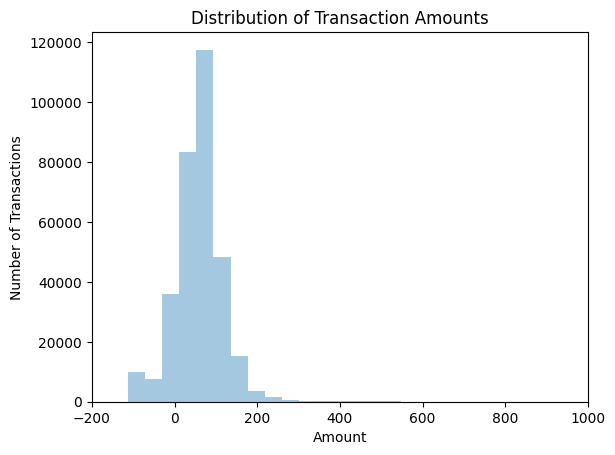

In [21]:
sns.distplot(new_data['Amount'].astype(float), kde=False, bins=80)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim(-200, 1000)
plt.show()

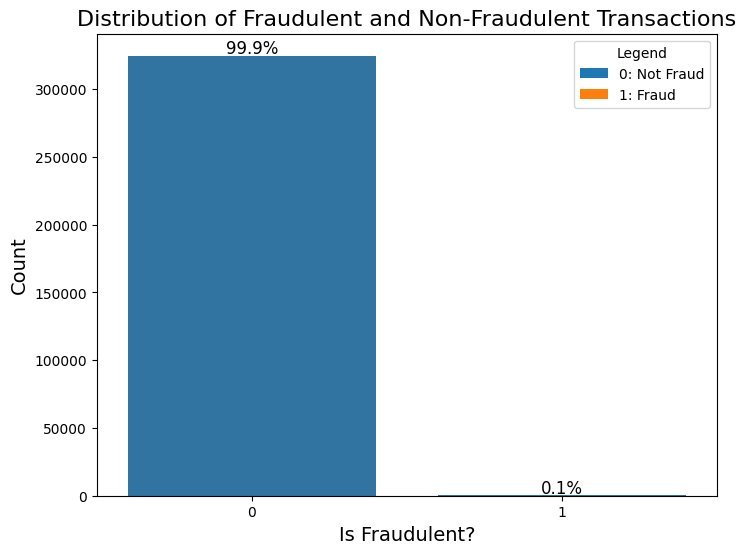

In [22]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Is Fraud?', data=new_data)

# Add percentage labels above the bars
total = len(new_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Set the title and labels
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions', fontsize=16)
plt.xlabel('Is Fraudulent?', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add the custom legend box
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, fc="#1f77b4"), plt.Rectangle((0, 0), 1, 1, fc="#ff7f0e")],
           labels=['0: Not Fraud', '1: Fraud'], title="Legend", loc='upper right')

# Display the plot
plt.show()

In [23]:
fraud_data = new_data[new_data['Is Fraud?'] == 1]
fraud_data.head()

,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
3151,2,2007,6,30,16:15,5.40,Swipe Transaction,Bloomville,OH,44818.0,5499,Bad PIN,1
3152,2,2007,7,5,09:54,165.17,Swipe Transaction,Bucyrus,OH,44820.0,4829,Bad PIN,1
5359,3,2012,7,15,19:37,96.18,Swipe Transaction,Madison,TN,37115.0,5300,Bad PIN,1
5476,3,2006,1,12,15:32,76.65,Swipe Transaction,Fort Lauderdale,FL,33309.0,4814,Bad PIN,1
6222,2,2013,10,4,06:32,843.13,Swipe Transaction,Strasburg,OH,44680.0,7549,Bad PIN,1


In [24]:
numerical_col = fraud_data.select_dtypes(include=['int', 'float'])
numerical_col

,Card,Year,Month,Day,Amount,Zip,MCC,Is Fraud?
3151,2,2007,6,30,5.40,44818.0,5499,1
3152,2,2007,7,5,165.17,44820.0,4829,1
5359,3,2012,7,15,96.18,37115.0,5300,1
5476,3,2006,1,12,76.65,33309.0,4814,1
6222,2,2013,10,4,843.13,44680.0,7549,1
...,...,...,...,...,...,...,...,...
309878,3,2006,1,10,4.01,28105.0,7922,1
312751,4,2015,4,19,303.86,28163.0,5310,1
313432,4,2008,2,2,70.03,56721.0,5094,1
313682,1,2014,3,2,107.51,44680.0,5300,1


In [25]:
categorical_col = list(new_data.select_dtypes(include=object).columns)
categorical_col

['Time', 'Use Chip', 'Merchant City', 'Merchant State', 'Errors?']

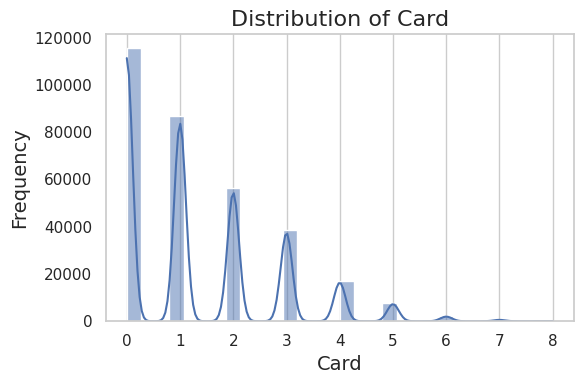

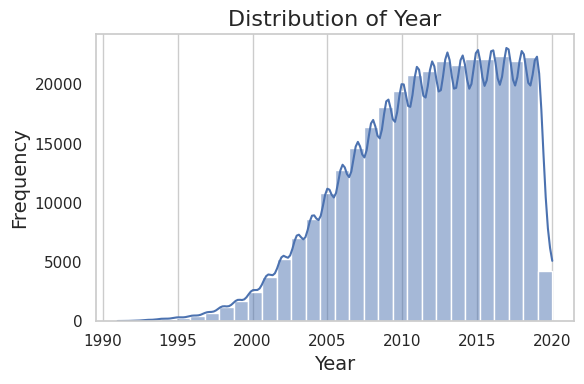

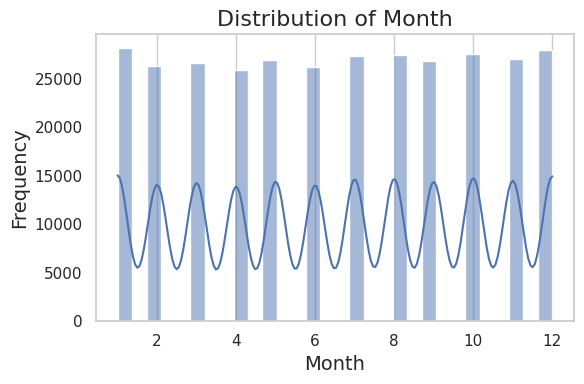

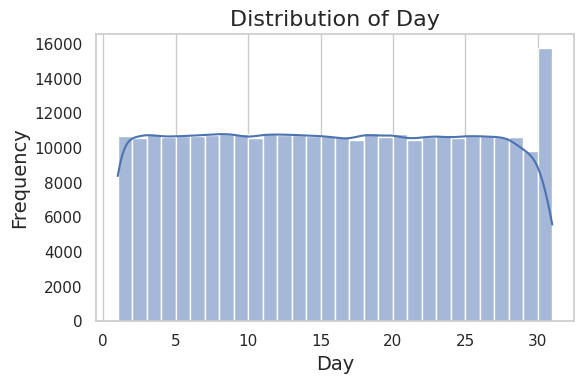

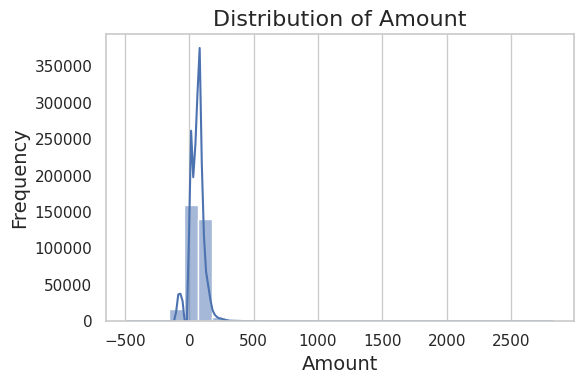

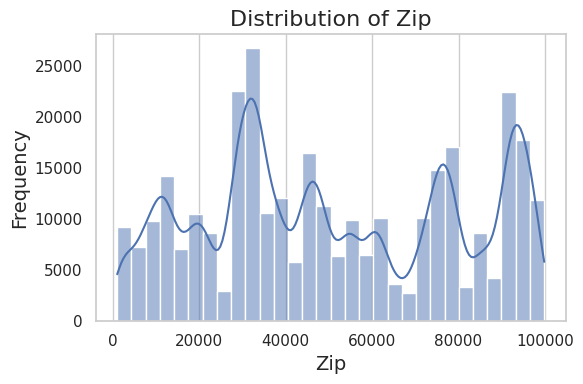

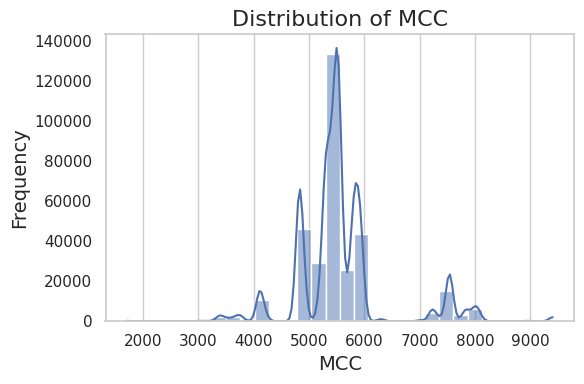

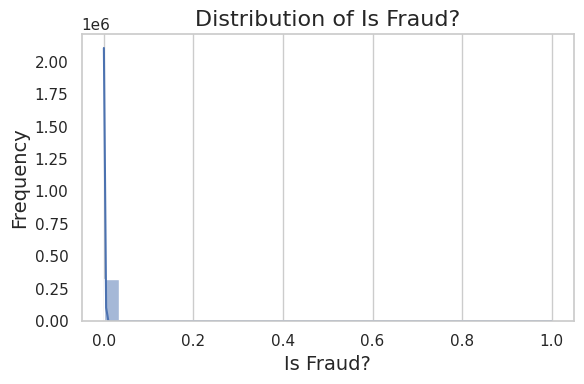

In [26]:
sns.set(style='whitegrid')

for col in numerical_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(new_data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

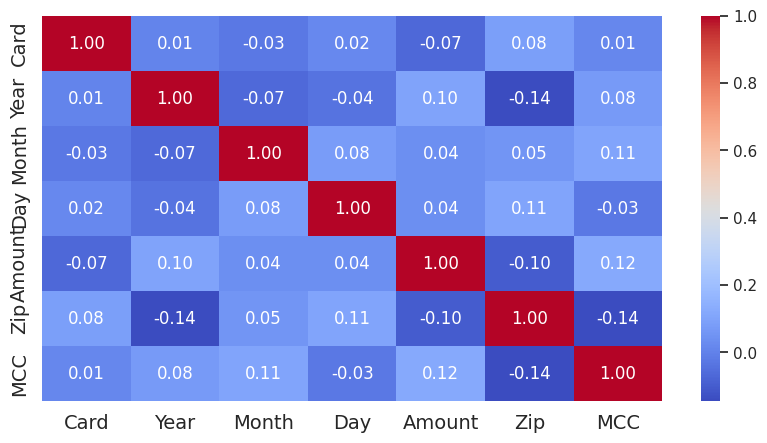

In [27]:
plt.figure(figsize=(10, 5))
sns.heatmap(fraud_data.drop(['Is Fraud?'],axis=1).select_dtypes(include=['int', 'float']).corr(),annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


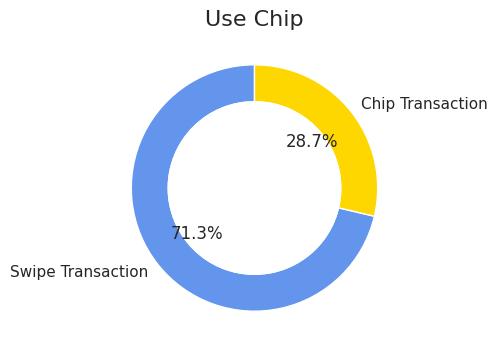

In [28]:
chip_data = new_data['Use Chip'].value_counts()

# Creating a donut chart
plt.figure(figsize=(8, 4))
plt.pie(chip_data, labels=chip_data.index, autopct='%1.1f%%', startangle=90, colors=['#6495ED', '#FFD700'],
        wedgeprops={'width': 0.3, 'edgecolor': 'w'})

# Adding a circle at the center to turn the pie chart into a donut chart
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))

plt.title('Use Chip', loc='center', fontsize=16)
plt.show()


In [29]:
new_data.groupby('Is Fraud?')['Use Chip'].value_counts()

Is Fraud?  Use Chip         
0          Swipe Transaction    231468
           Chip Transaction      93157
1          Swipe Transaction       203
           Chip Transaction         16
Name: count, dtype: int64

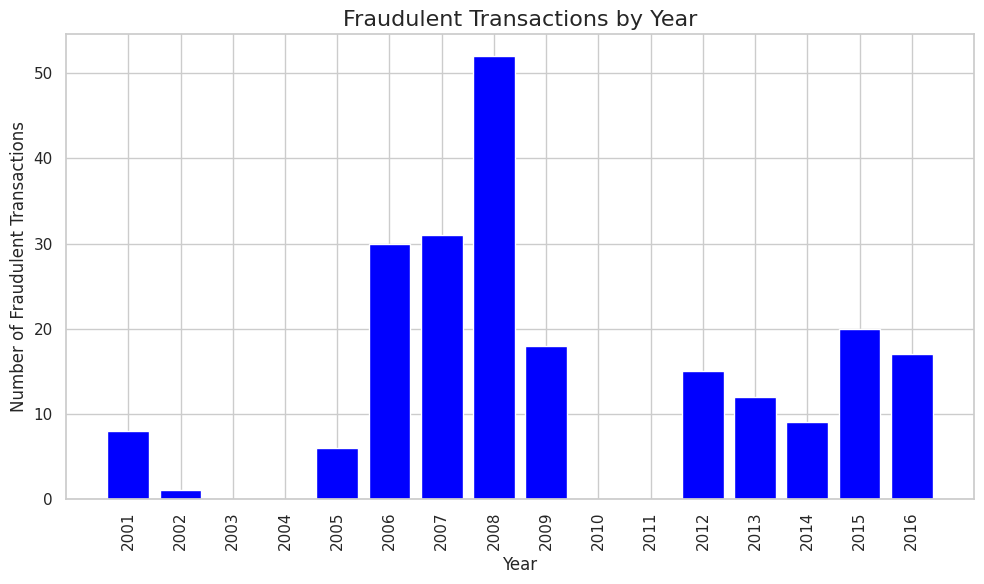

In [30]:
fraud_by_year = fraud_data['Year'].value_counts().sort_index()

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(fraud_by_year.index, fraud_by_year.values, color='blue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('Fraudulent Transactions by Year', fontsize=16)
plt.xticks(np.arange(fraud_by_year.index.min(), fraud_by_year.index.max() + 1, 1), rotation=90)
plt.tight_layout()
plt.show()

In [31]:
print('Merchant City has not fraud: ', new_data[new_data['Is Fraud?']==0]['Merchant City'].nunique())
print('Merchant City has fraud: ', new_data[new_data['Is Fraud?']==1]['Merchant City'].nunique())

Merchant City has not fraud:  6860
Merchant City has fraud:  184


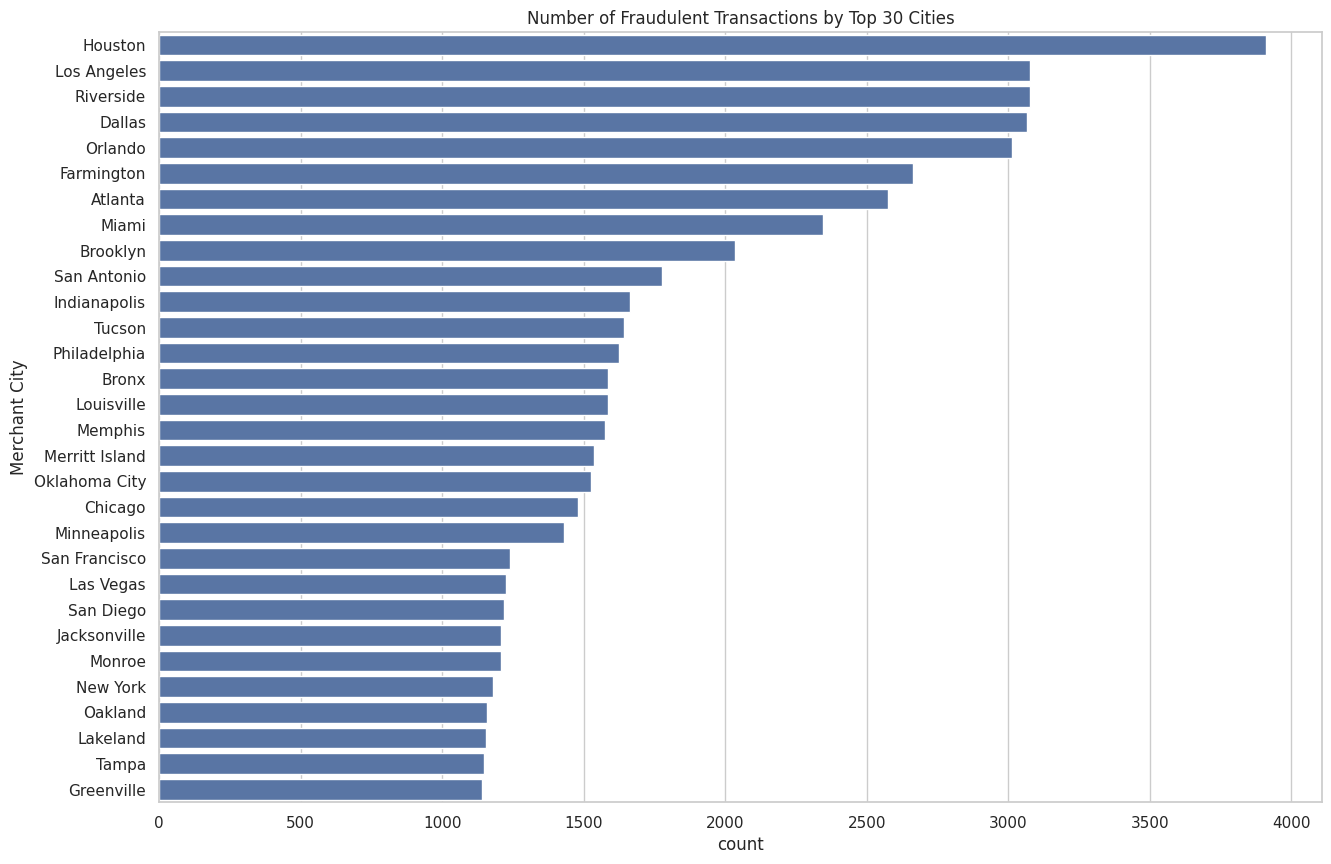

In [34]:
plt.figure(figsize=(15, 10))
top_cities = new_data['Merchant City'].value_counts().head(30).index
sns.countplot(data=new_data, y='Merchant City', order=top_cities)
plt.title('Number of Fraudulent Transactions by Top 30 Cities')
plt.show()

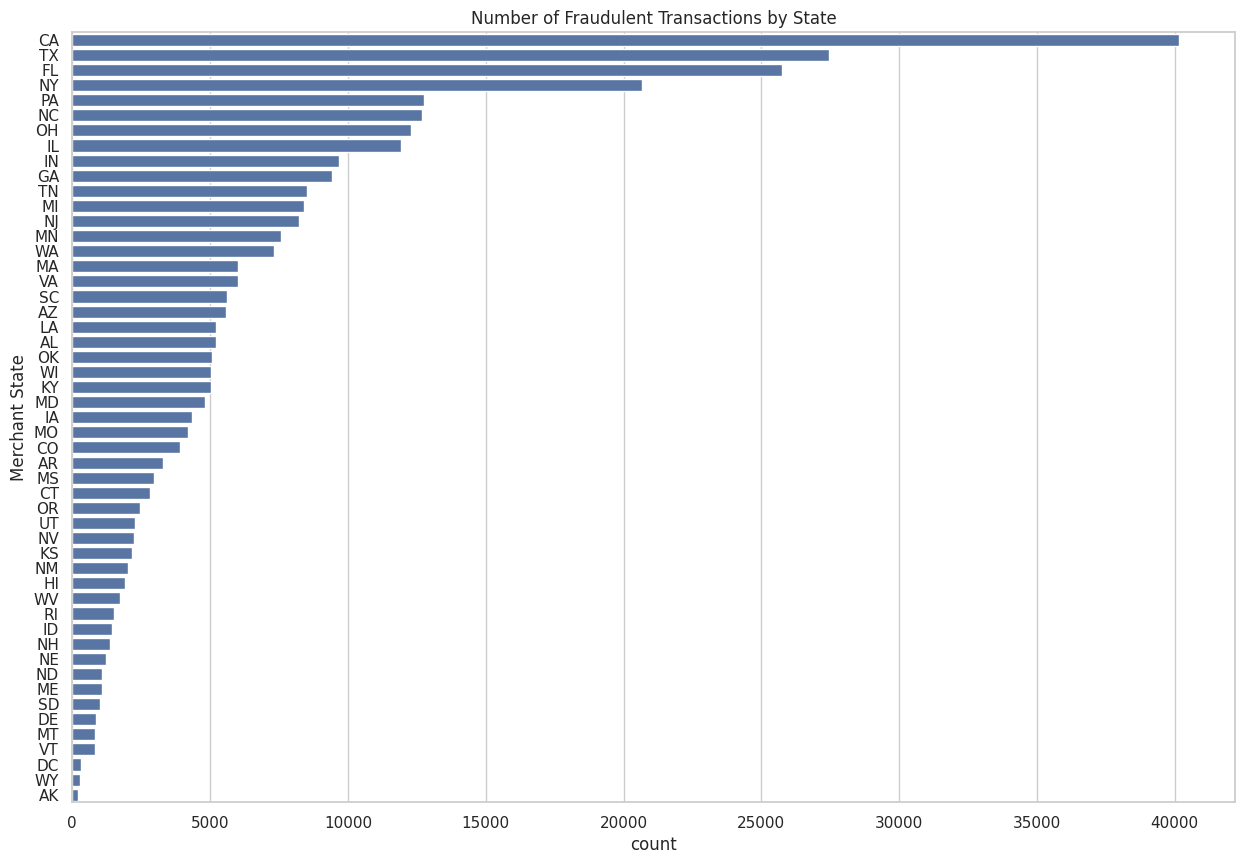

In [33]:
plt.figure(figsize=(15, 10))
sns.countplot(data=new_data, y='Merchant State', order=new_data['Merchant State'].value_counts().index)
plt.title('Number of Fraudulent Transactions by State')
plt.show()

In [35]:
new_data.groupby('Errors?')['Is Fraud?'].value_counts()

Errors?                                Is Fraud?
Bad CVV                                0                 4
Bad Card Number                        0                 3
Bad Card Number,Insufficient Balance   0                 1
Bad Expiration                         0                 1
Bad PIN                                0             58209
                                       1               139
Bad PIN,Insufficient Balance           0               570
                                       1                 6
Bad PIN,Technical Glitch               0               127
                                       1                 1
Bad Zipcode                            0              2079
Bad Zipcode,Insufficient Balance       0                13
Bad Zipcode,Technical Glitch           0                 7
Insufficient Balance                   0            220675
                                       1                65
Insufficient Balance,Technical Glitch  0               423
Technical Glitch                       0             42513
                                       1                 8
Name: count, dtype: int64

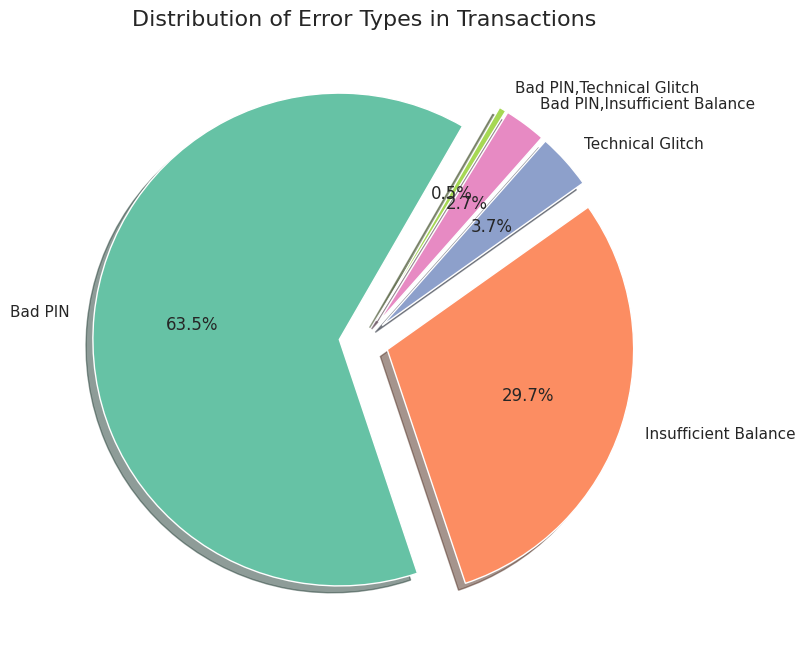

In [36]:
error_counts = fraud_data['Errors?'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(error_counts, labels=error_counts.index, autopct='%1.1f%%', startangle=60, colors=sns.color_palette("Set2"), explode=[0.1]*len(error_counts), shadow=True)

plt.title('Distribution of Error Types in Transactions', fontsize=16)
plt.show()

In [38]:
new_data.drop('Card', axis=1, inplace=True)

In [40]:
new_data.columns

Index(['Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip', 'Merchant City',
       'Merchant State', 'Zip', 'MCC', 'Errors?', 'Is Fraud?'],
      dtype='object')

In [41]:
# Feature extraction: Extarct Hours and Minutes from Time column
new_data['Hours'] = new_data['Time'].str[0:2]
new_data['Minutes'] = new_data['Time'].str[3:5]

new_data.insert(3, 'Hours', new_data.pop('Hours'))
new_data.insert(4, 'Minutes', new_data.pop('Minutes'))

In [42]:
new_data.drop('Time', axis=1, inplace=True)

In [43]:
new_data.head()

,Year,Month,Day,Hours,Minutes,Amount,Use Chip,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,2002,9,9,09,40,65.50,Swipe Transaction,La Verne,CA,91750.0,7538,Technical Glitch,0
1,2002,9,12,06,21,122.10,Swipe Transaction,La Verne,CA,91750.0,5411,Insufficient Balance,0
2,2002,9,17,06,09,120.19,Swipe Transaction,La Verne,CA,91750.0,5912,Insufficient Balance,0
3,2002,9,20,06,01,104.77,Swipe Transaction,La Verne,CA,91750.0,5311,Insufficient Balance,0
4,2002,9,29,06,06,119.61,Swipe Transaction,La Verne,CA,91750.0,5912,Insufficient Balance,0


In [44]:
# Convert data type
new_data['Hours'] = new_data['Hours'].astype('int')
new_data['Minutes'] = new_data['Minutes'].astype('float')

In [45]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324844 entries, 0 to 324843
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            324844 non-null  int64  
 1   Month           324844 non-null  int64  
 2   Day             324844 non-null  int64  
 3   Hours           324844 non-null  int64  
 4   Minutes         324844 non-null  float64
 5   Amount          324844 non-null  float64
 6   Use Chip        324844 non-null  object 
 7   Merchant City   324844 non-null  object 
 8   Merchant State  324844 non-null  object 
 9   Zip             324844 non-null  float64
 10  MCC             324844 non-null  int64  
 11  Errors?         324844 non-null  object 
 12  Is Fraud?       324844 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 32.2+ MB


In [46]:
new_data.drop('Minutes', axis=1, inplace=True)

In [47]:
new_data.head()

,Year,Month,Day,Hours,Amount,Use Chip,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,2002,9,9,9,65.50,Swipe Transaction,La Verne,CA,91750.0,7538,Technical Glitch,0
1,2002,9,12,6,122.10,Swipe Transaction,La Verne,CA,91750.0,5411,Insufficient Balance,0
2,2002,9,17,6,120.19,Swipe Transaction,La Verne,CA,91750.0,5912,Insufficient Balance,0
3,2002,9,20,6,104.77,Swipe Transaction,La Verne,CA,91750.0,5311,Insufficient Balance,0
4,2002,9,29,6,119.61,Swipe Transaction,La Verne,CA,91750.0,5912,Insufficient Balance,0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

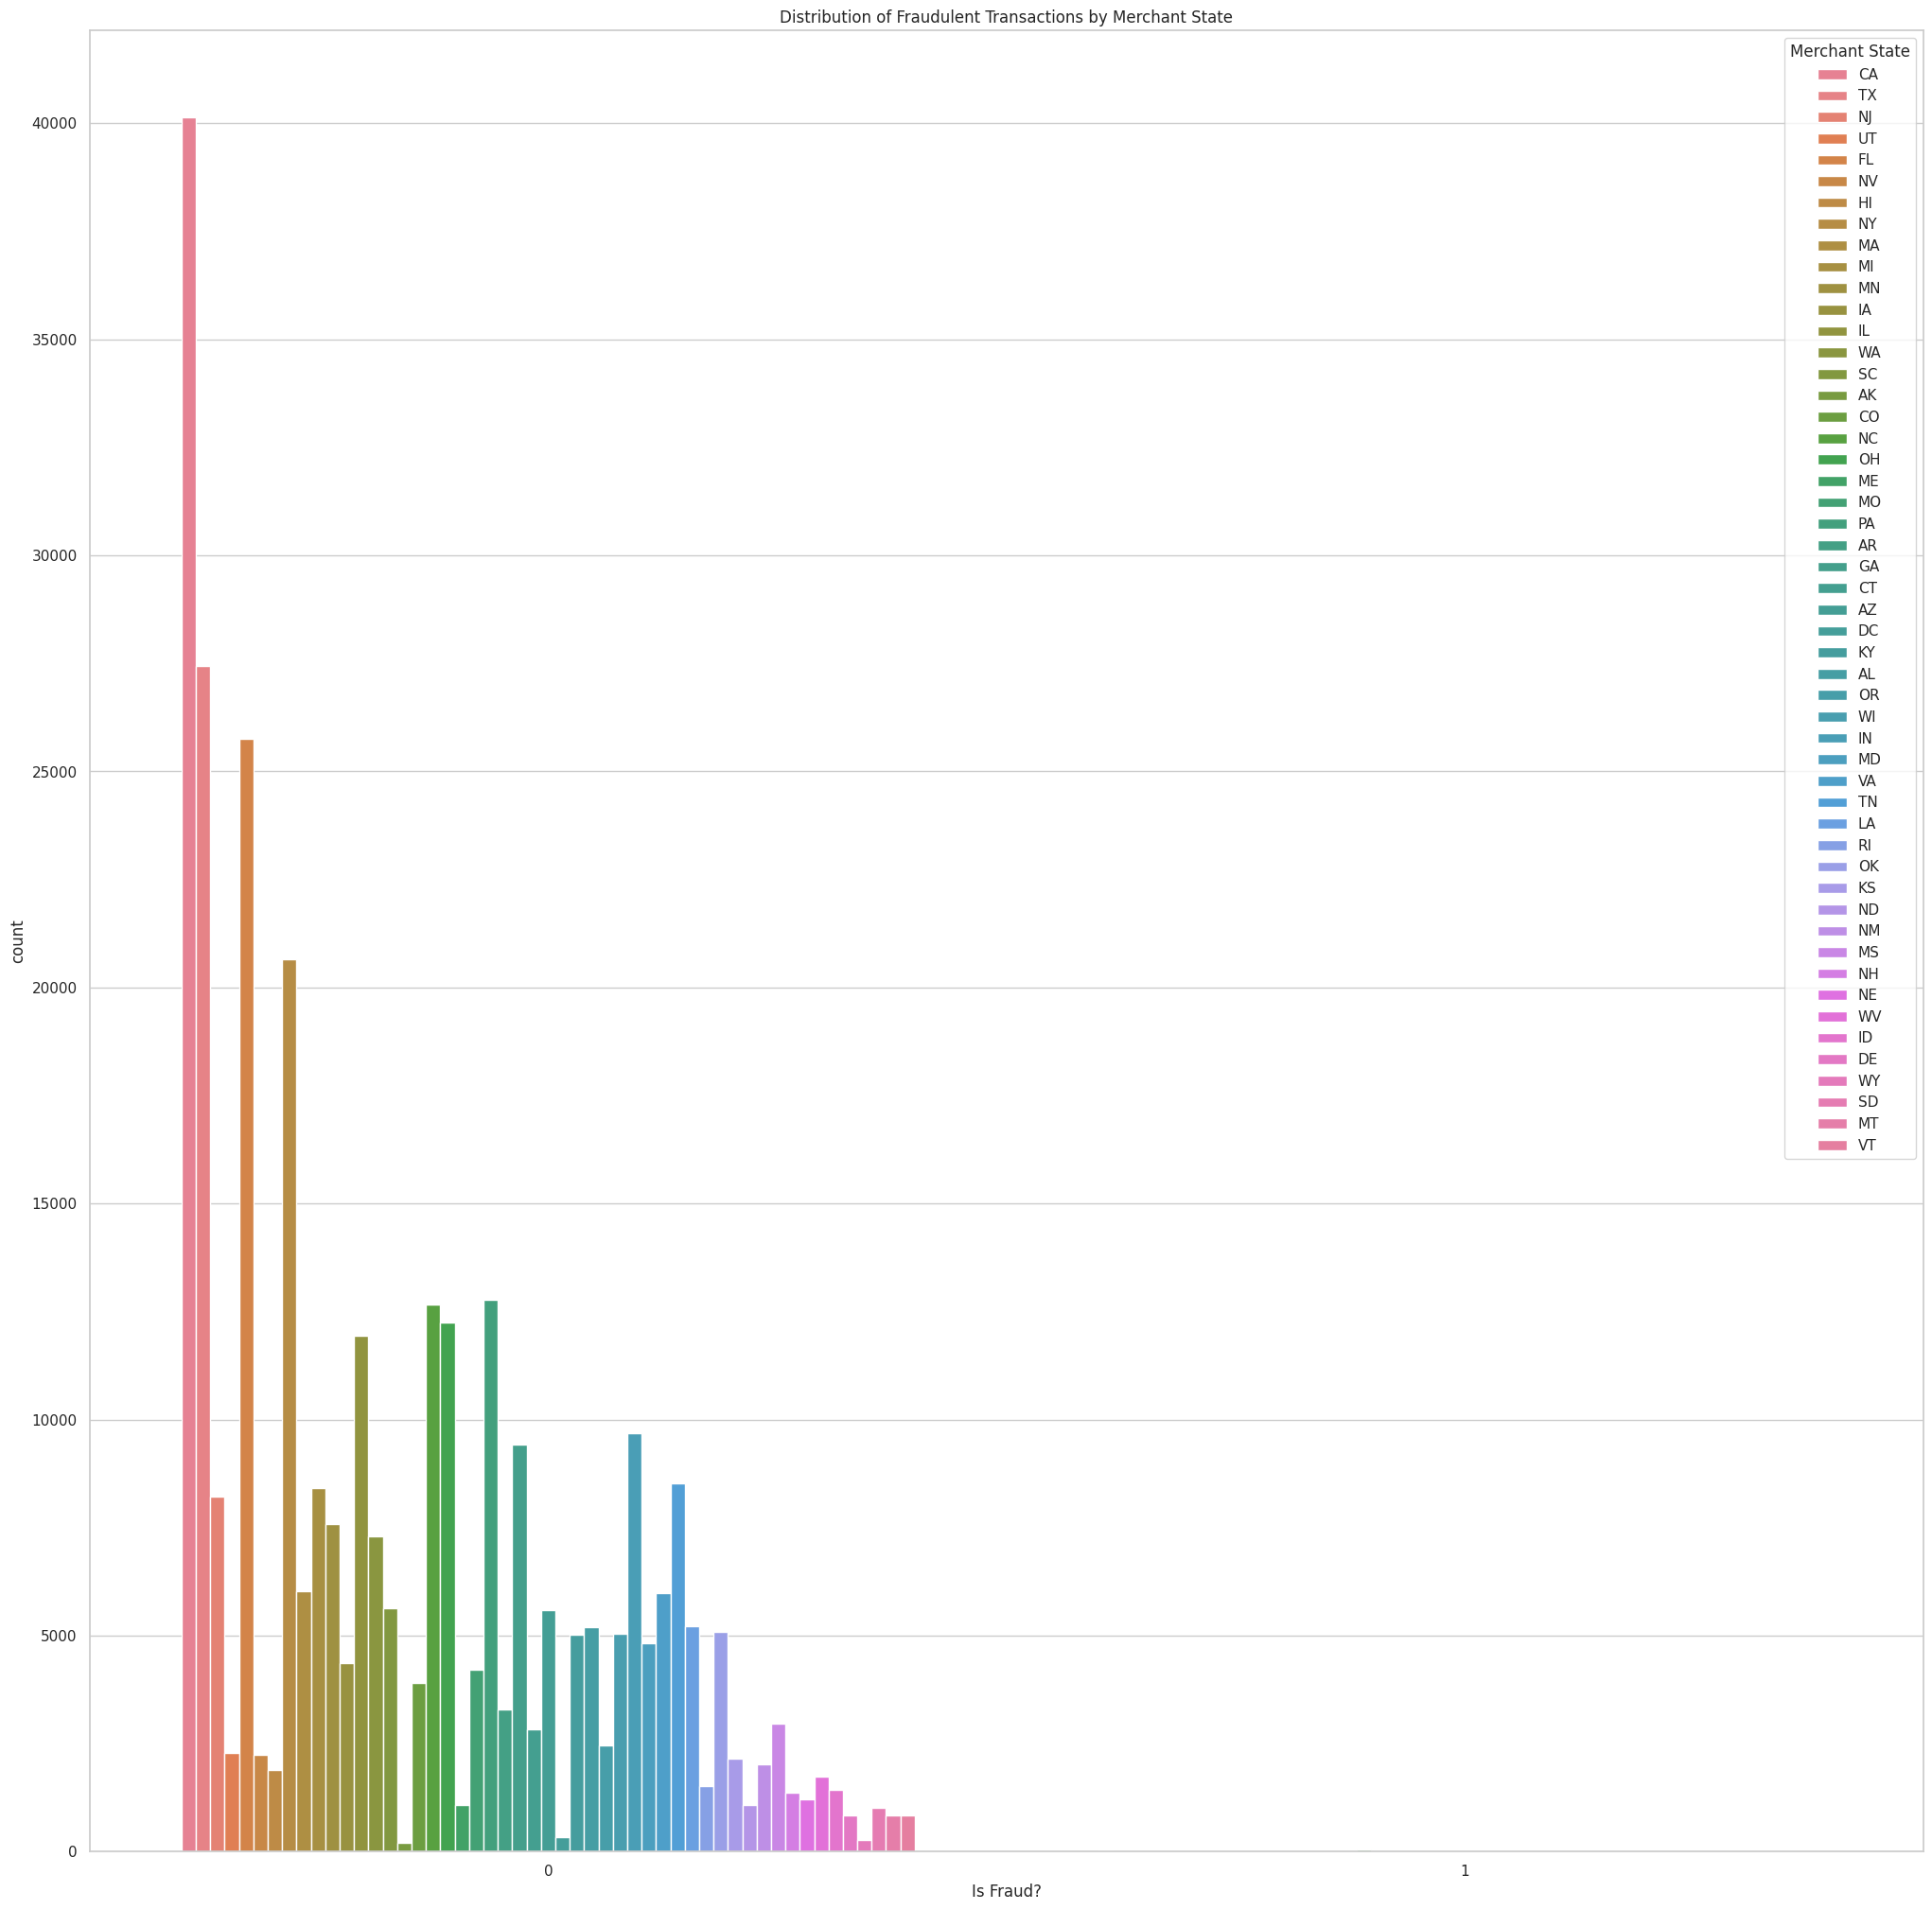

In [48]:
plt.figure(figsize=(25,25))
sns.countplot(data=new_data, x='Is Fraud?', hue='Merchant State')
plt.title('Distribution of Fraudulent Transactions by Merchant State')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

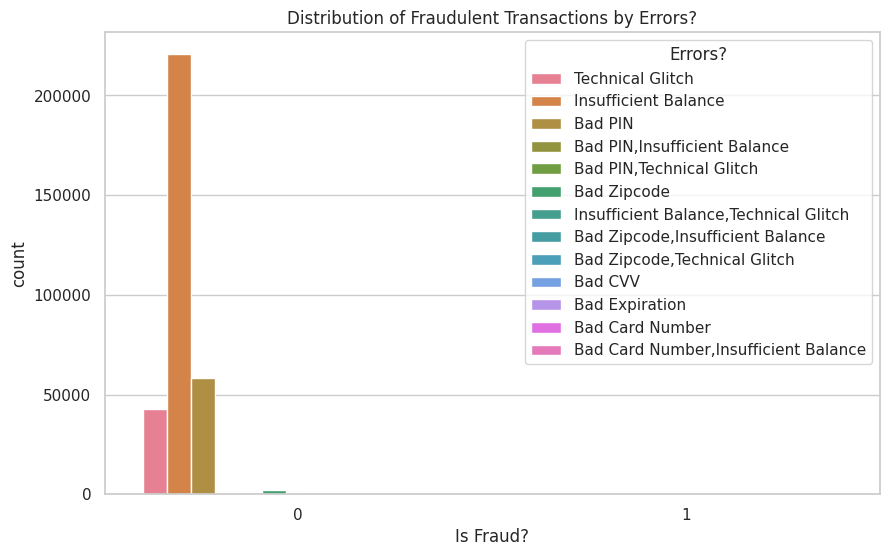

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(data=new_data, x='Is Fraud?', hue='Errors?')
plt.title('Distribution of Fraudulent Transactions by Errors?')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

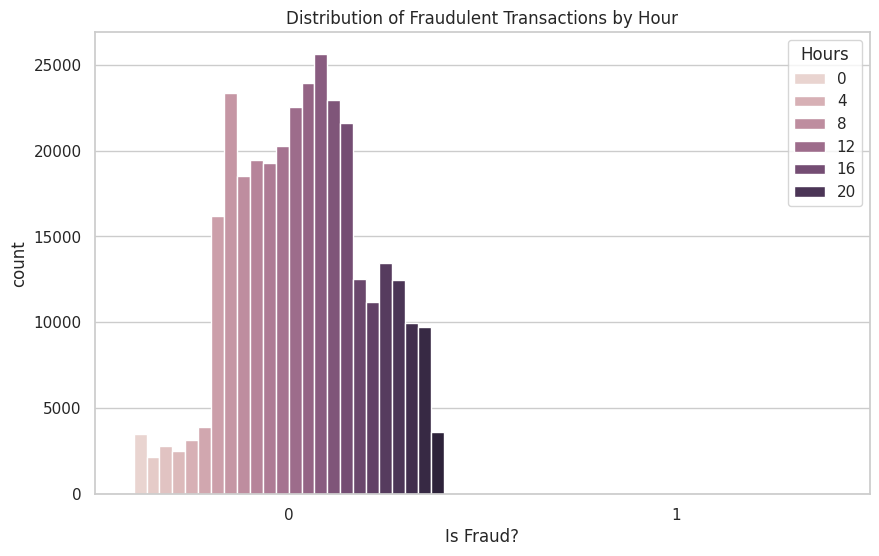

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(data=new_data, x='Is Fraud?', hue='Hours')
plt.title('Distribution of Fraudulent Transactions by Hour')
plt.show()

In [56]:
# make a label encoder for these columns
columns = ['Use Chip',  'Merchant City', 'Merchant State', 'Errors?']
le = LabelEncoder()
for col in columns:
    new_data[col] = le.fit_transform(new_data[col])

In [57]:
new_data.head()

,Year,Month,Day,Hours,Amount,Use Chip,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,2002,9,9,9,65.50,1,3248,4,91750.0,7538,12,0
1,2002,9,12,6,122.10,1,3248,4,91750.0,5411,10,0
2,2002,9,17,6,120.19,1,3248,4,91750.0,5912,10,0
3,2002,9,20,6,104.77,1,3248,4,91750.0,5311,10,0
4,2002,9,29,6,119.61,1,3248,4,91750.0,5912,10,0


In [58]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324844 entries, 0 to 324843
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            324844 non-null  int64  
 1   Month           324844 non-null  int64  
 2   Day             324844 non-null  int64  
 3   Hours           324844 non-null  int64  
 4   Amount          324844 non-null  float64
 5   Use Chip        324844 non-null  int64  
 6   Merchant City   324844 non-null  int64  
 7   Merchant State  324844 non-null  int64  
 8   Zip             324844 non-null  float64
 9   MCC             324844 non-null  int64  
 10  Errors?         324844 non-null  int64  
 11  Is Fraud?       324844 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 29.7 MB


In [59]:
# Defining Features and Target Variables
x = new_data.drop('Is Fraud?', axis=1)
y = new_data['Is Fraud?']

In [60]:
print('Shape of X: ', x.shape)
print('Shape of Y: ', y.shape)

Shape of X:  (324844, 11)
Shape of Y:  (324844,)


In [61]:
smote = SMOTE(random_state=32)
x_res, y_res = smote.fit_resample(x, y)

print(f'Original dataset shape {Counter(y)}')
print(f"Resampled dataset shape: {Counter(y_res)}")

Original dataset shape Counter({0: 324625, 1: 219})
Resampled dataset shape: Counter({0: 324625, 1: 324625})


In [62]:
# Splitting the Data and Scaling
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=32)

In [63]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Architecture

Accuracy :  0.7892029264536004
precision :  0.7891614533575765
Recall :  0.7890884999383705


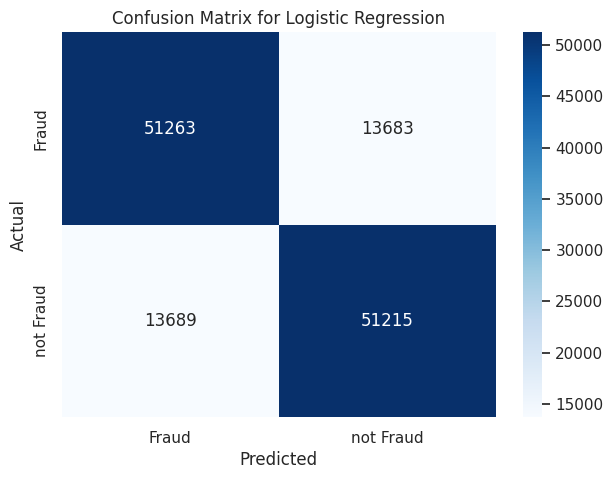

In [64]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)

print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('precision : ', metrics.precision_score(y_test, y_pred))
print('Recall : ', metrics.recall_score(y_test, y_pred))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fraud', 'not Fraud'],
            yticklabels=['Fraud', 'not Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [65]:
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     64946
           1       0.79      0.79      0.79     64904

    accuracy                           0.79    129850
   macro avg       0.79      0.79      0.79    129850
weighted avg       0.79      0.79      0.79    129850



In [66]:
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7892029264536004


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy :  0.9441971505583365
precision :  0.9364062973054799
Recall :  0.9530845556514237


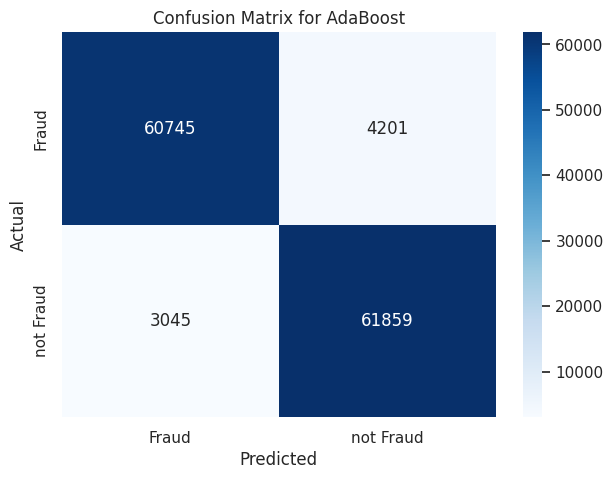

In [67]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
Ada_boost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

Ada_boost.fit(x_train, y_train)

predict = Ada_boost.predict(x_test)

print('Accuracy : ', metrics.accuracy_score(y_test, predict))
print('precision : ', metrics.precision_score(y_test, predict))
print('Recall : ', metrics.recall_score(y_test, predict))

conf_matrix = metrics.confusion_matrix(y_test, predict)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fraud', 'not Fraud'],
            yticklabels=['Fraud', 'not Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

In [68]:
print(f"Classification Report:\n{classification_report(y_test, predict)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     64946
           1       0.94      0.95      0.94     64904

    accuracy                           0.94    129850
   macro avg       0.94      0.94      0.94    129850
weighted avg       0.94      0.94      0.94    129850



In [74]:
desired_samples = int(round(324625 / 219))

# Update the sampling_strategy dictionary
sampling_strategy = {1: desired_samples}

# Now, create and apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

In [75]:
y_resampled.value_counts()

,count
Is Fraud?,
0,324625
1,1482


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64954
           1       0.95      0.68      0.79       268

    accuracy                           1.00     65222
   macro avg       0.97      0.84      0.89     65222
weighted avg       1.00      1.00      1.00     65222



Text(91.25, 0.5, 'Actual')

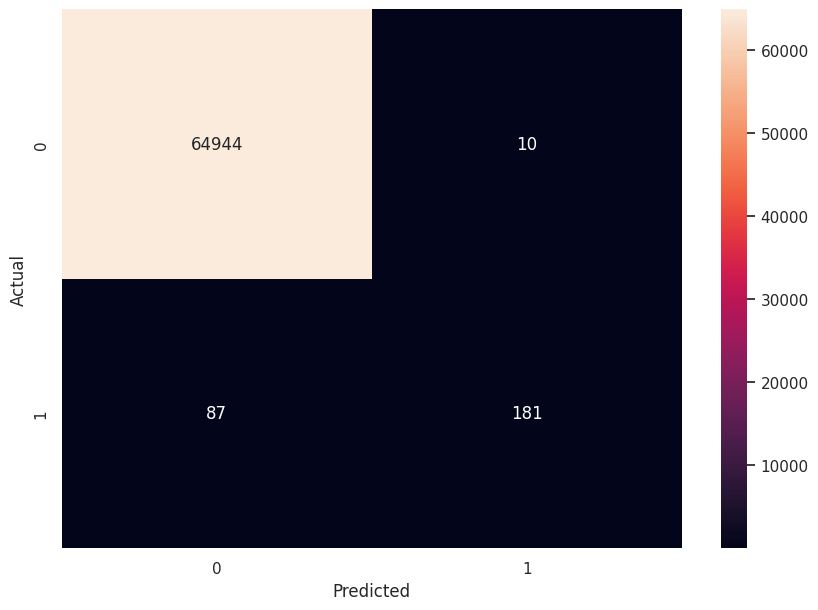

In [80]:
from xgboost import XGBClassifier

X_train, X_test, y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

stander = StandardScaler()
X_train = stander.fit_transform(X_train)
X_test = stander.transform(X_test)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, Y_test)


report = classification_report(Y_test, xgb.predict(X_test))
print(report)

cm = confusion_matrix(Y_test, xgb.predict(X_test))
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')